CV Assignment 1

Gonçalo Garganta - up201806672

João Leitão - up201806619

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2 as cv
import glob
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

We must start by loading all calibration images and detecting the corners of the chess board on them.

After that is done we can calculate the new image matrix and the necessary values for the correction of the next images:

In [ ]:
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((4*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:4].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('/content/drive/My Drive/IntrinsicCalibration/calib_img *.png')

for fname in images:

    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,4), None)

    # If found, add object points, image points (after refining them)

    if ret == True:

        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        #cv.drawChessboardCorners(img, (7,6), corners2, ret)
        #cv2_imshow(img)
        #cv.waitKey(500)

cv.destroyAllWindows()

# Get calibration info
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

With all the data for correction available we can load another image of the chessboard, which size we know (each square is 21mm by 21mm), and check how many pixels that equates to:

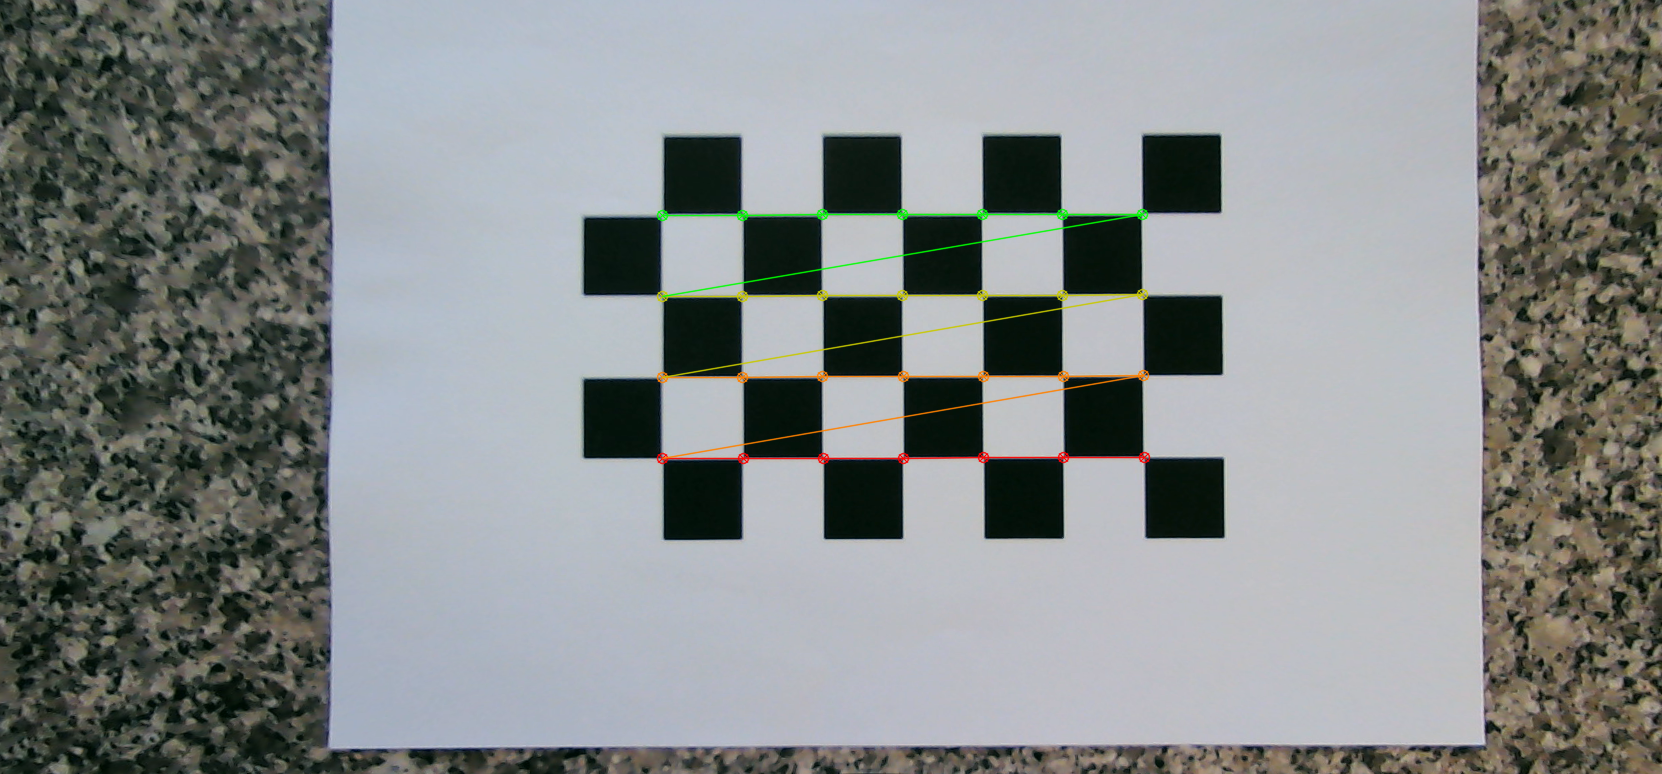


Number of pixels in a side: 80.25 

Area of one pixel: 0.068


In [ ]:
extrinsic = cv.imread("/content/drive/My Drive/WhiteBackground/extrinsic.png")

h,  w = extrinsic.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# undistort
square = cv.undistort(extrinsic, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
square = square[y:y+h, x:x+w]
cv.imwrite('calibresult.png', square)

#cv2_imshow(square)

objp2 = np.zeros((4*7,3), np.float32)
objp2[:,:2] = np.mgrid[0:7,0:4].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints2 = [] # 3d point in real world space
imgpoints2 = [] # 2d points in image plane.

gray_square = cv.cvtColor(square, cv.COLOR_BGR2GRAY)

ret, corners = cv.findChessboardCorners(gray_square, (7,4), None)

objpoints2.append(objp2)
corners2_square = cv.cornerSubPix(gray_square,corners, (11,11), (-1,-1), criteria)
imgpoints2.append(corners2_square)

# Draw and display the corners
cv.drawChessboardCorners(square, (7,4), corners2_square, ret)
cv2_imshow(square)

c1 = corners[0,0,0]
c2 = corners[1,0,0]

side = round(c1-c2, 2)

print(f"\nNumber of pixels in a side: {side} \n")

pix = (21/side)**2

print(f"Area of one pixel: {round(pix, 3)}")

# ~80 pixels per square, which means 80 pixels = 21 mm 
# 1 pixel is 0,2625 mm
# Area of 1 pix ~ 0.06 mm2

Now we can start loading the M&M pictures, undistorting them, and computing the number and area of each chocolate:

------------------ IMAGE 0 ------------------
Total labels: 0 

Green labels: 0
Green area in pixels: 0
Green area in millimeters: 0.0 

Red labels: 0
Red area in pixels: 0
Red area in millimeters: 0.0 

Blue labels: 0
Blue area in pixels: 0
Blue area in millimeters: 0.0 

Yellow labels: 0 
Yellow area in pixels: 0
Yellow area in millimeters: 0.0 

Total area in pixels: 0 
Total area in millimeters: 0.0 


------------------ IMAGE 1 ------------------
Total labels: 10 

Green labels: 0
Green area in pixels: 0
Green area in millimeters: 0.0 

Red labels: 0
Red area in pixels: 0
Red area in millimeters: 0.0 

Blue labels: 5
Blue area in pixels: 25995
Blue area in millimeters: 1780.08 

Yellow labels: 5 
Yellow area in pixels: 11868
Yellow area in millimeters: 812.69 

Total area in pixels: 37863 
Total area in millimeters: 2592.77 


------------------ IMAGE 2 ------------------
Total labels: 15 

Green labels: 0
Green area in pixels: 0
Green area in millimeters: 0.0 

Red labels: 5
Red 

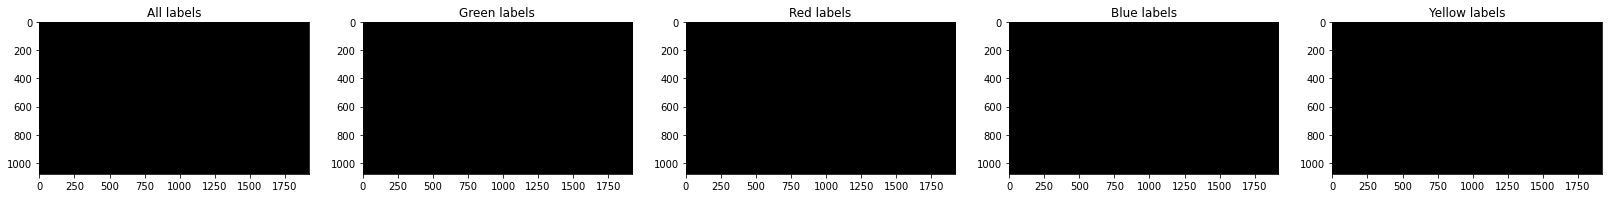

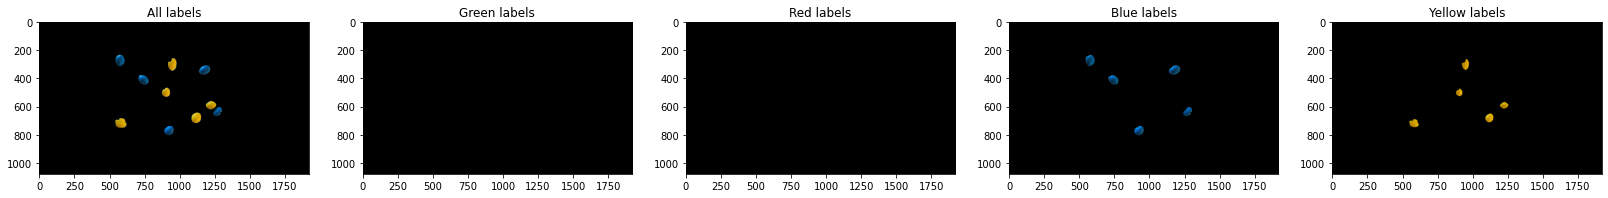

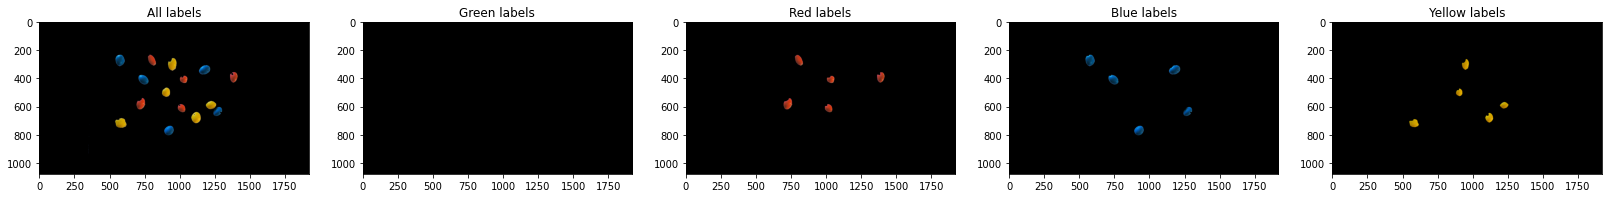

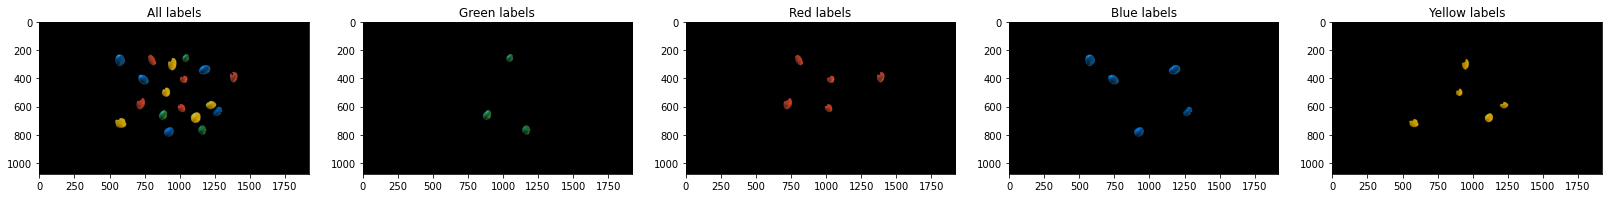

In [ ]:
bg = cv.imread('/content/drive/My Drive/WhiteBackground/calib_img 0.png')

h,  w = bg.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# undistort
dst = cv.undistort(bg, mtx, dist, None, newcameramtx)

# Convert to grayscale
gray = cv.cvtColor(dst,cv.COLOR_RGB2GRAY)

# Convert to binary
threshold = 160
max_value = 255
thresh_type = cv.THRESH_BINARY
roi_binary = cv.threshold(gray, threshold, max_value, thresh_type)[1] 

kernel = np.ones((3, 3), 'uint8')

roi_binary = cv.erode(roi_binary, kernel, iterations=2)
# This function returns a tuple: (threshold, binary_image), hence the [1]
num_labels, labels_im = cv.connectedComponents(roi_binary)
num_labels
#cv2_imshow(roi_binary)

pics = glob.glob('/content/drive/My Drive/WhiteBackground/calib_img *.png')

i = 0

for fname in pics:

  print(f"------------------ IMAGE {i} ------------------")

  fg = cv.imread(fname)

  h,  w = fg.shape[:2]
  newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

  # undistort
  dst_fg = cv.undistort(fg, mtx, dist, None, newcameramtx)

  roi_img = cv.bitwise_and(dst_fg, dst_fg, mask=roi_binary)

  # Showing the output
  #cv2_imshow(roi_img)

  # Convert from BGR to HSV 
  hsv = cv.cvtColor(roi_img, cv.COLOR_BGR2HSV);

  # loop over each of the individual channels and display them
  h_img, s_img, v_img  = cv.split(hsv)

  gray = cv.cvtColor(roi_img, cv.COLOR_BGR2GRAY);

  threshold = 120
  kernel = np.ones((6,6),np.uint8)

  img_binary = cv.threshold(s_img, threshold, max_value, thresh_type)[1] 
  #img_binary = cv.dilate(img_binary, kernel, iterations=3)
  opened = cv.morphologyEx(img_binary, cv.MORPH_OPEN, kernel)
  #cv2_imshow(opened)

  #Connected-Component Labeling
  ret, labels = cv.connectedComponents(opened)
  lab = np.max(labels)
  print(f"Total labels: {lab} \n")

  if (np.max(labels) == 0):
    lab = 1

  # Map component labels to hue val
  label_hue = np.uint8(179*labels/lab)
  blank_ch = 255*np.ones_like(label_hue)
  labeled_img2 = cv.merge([label_hue, blank_ch, blank_ch])

  if (np.max(labels) == 0):
    lab = 0

  # cvt to BGR for display
  labeled_img = cv.cvtColor(labeled_img2, cv.COLOR_HSV2BGR)

  # set bg label to black
  labeled_img[label_hue==0] = 0

  segmented_img = cv.bitwise_and(dst_fg, dst_fg, mask=img_binary)
  # Showing the output
  #cv2_imshow(segmented_img)

  cv.cvtColor(segmented_img, cv.COLOR_BGR2HSV,segmented_img);

  ## mask of green (36,25,25) ~ (86, 255,255)

  mask_g = cv.inRange(segmented_img, (36, 25, 25), (86, 255,255))

  mask_g = cv.erode(mask_g, kernel, iterations=2)
  mask_g = cv.dilate(mask_g, kernel, iterations=5)
  cv.cvtColor(segmented_img, cv.COLOR_HSV2BGR,segmented_img);
  green = cv.bitwise_and(segmented_img, segmented_img, mask=mask_g)

  #cv2_imshow(green)
  ret, labels = cv.connectedComponents(mask_g)
  print(f"Green labels: {np.max(labels)}")

  g_pixels = cv.countNonZero(mask_g)
  print(f"Green area in pixels: {g_pixels}")

  area_g = (cv.countNonZero(mask_g)*pix)
  print(f"Green area in millimeters: {round(area_g, 2)} \n")

  #Mask for reds
  cv.cvtColor(segmented_img, cv.COLOR_BGR2HSV,segmented_img);
  mask_r = cv.inRange(segmented_img, (0, 25, 25), (15, 255,255)) + cv.inRange(segmented_img, (110, 25, 25), (255, 255,255))
  mask_r = cv.erode(mask_r, kernel, iterations=2)
  mask_r = cv.dilate(mask_r, kernel, iterations=3)
  cv.cvtColor(segmented_img, cv.COLOR_HSV2BGR,segmented_img);
  red = cv.bitwise_and(segmented_img, segmented_img, mask=mask_r)

  #cv2_imshow(red)
  ret, labels = cv.connectedComponents(mask_r)
  print(f"Red labels: {np.max(labels)}")

  r_pixels = cv.countNonZero(mask_r)
  print(f"Red area in pixels: {r_pixels}")

  area_r = (cv.countNonZero(mask_r)*pix)
  print(f"Red area in millimeters: {round(area_r, 2)} \n")

  #Mask for blues
  cv.cvtColor(segmented_img, cv.COLOR_BGR2HSV,segmented_img);
  mask_b = cv.inRange(segmented_img, (100, 25, 25), (110, 255,255))
  mask_b = cv.erode(mask_b, kernel, iterations=2)
  mask_b = cv.dilate(mask_b, kernel, iterations=5)
  cv.cvtColor(segmented_img, cv.COLOR_HSV2BGR,segmented_img);
  blue = cv.bitwise_and(segmented_img, segmented_img, mask=mask_b)

  #cv2_imshow(blue)
  ret, labels = cv.connectedComponents(mask_b)
  print(f"Blue labels: {np.max(labels)}")

  b_pixels = cv.countNonZero(mask_b)
  print(f"Blue area in pixels: {b_pixels}")

  area_b = (cv.countNonZero(mask_b)*pix)
  print(f"Blue area in millimeters: {round(area_b, 2)} \n")

  #Mask for yellows
  cv.cvtColor(segmented_img, cv.COLOR_BGR2HSV,segmented_img);
  mask_y = cv.inRange(segmented_img, (15, 25, 25), (40, 255,255))
  mask_y = cv.erode(mask_y, kernel, iterations=2)
  cv.cvtColor(segmented_img, cv.COLOR_HSV2BGR,segmented_img);
  yellow = cv.bitwise_and(segmented_img, segmented_img, mask=mask_y)

  #cv2_imshow(yellow)
  ret, labels = cv.connectedComponents(mask_y)
  print(f"Yellow labels: {np.max(labels)} ")

  y_pixels = cv.countNonZero(mask_y)
  print(f"Yellow area in pixels: {y_pixels}")

  area_y = (cv.countNonZero(mask_y)*pix)
  print(f"Yellow area in millimeters: {round(area_y, 2)} \n")

  total_pixels = g_pixels+r_pixels+b_pixels+y_pixels
  total_area = area_g+area_r+area_b+area_y
  print(f"Total area in pixels: {total_pixels} ")
  print(f"Total area in millimeters: {round(total_area, 2)} \n\n")

  # converting from BGR to RGB for displaying in plt.
  cv.cvtColor(segmented_img, cv.COLOR_BGR2RGB, segmented_img); 
  cv.cvtColor(green, cv.COLOR_BGR2RGB, green); 
  cv.cvtColor(red, cv.COLOR_BGR2RGB, red); 
  cv.cvtColor(blue, cv.COLOR_BGR2RGB, blue); 
  cv.cvtColor(yellow, cv.COLOR_BGR2RGB, yellow); 

  plt.figure(figsize=(28,29))
  plt.subplot(151)
  plt.imshow(segmented_img)
  plt.title('All labels')

  plt.subplot(152)
  plt.imshow(green)
  plt.title('Green labels')

  plt.subplot(153)
  plt.imshow(red)
  plt.title('Red labels')

  plt.subplot(154)
  plt.imshow(blue)
  plt.title('Blue labels')

  plt.subplot(155)
  plt.imshow(yellow)
  plt.title('Yellow labels')

  i = i+1

To make it easier to read the data we can plot the histograms of the area of each M&M per color:

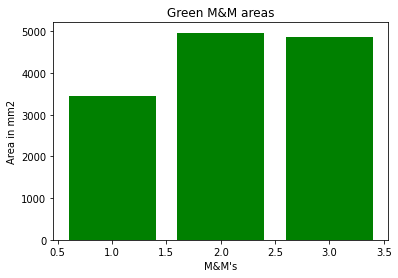

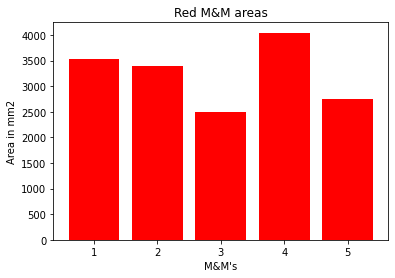

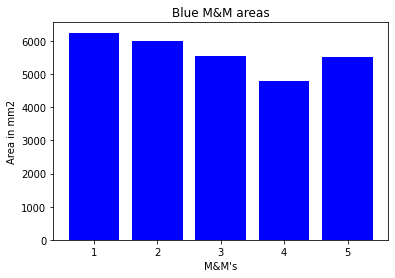

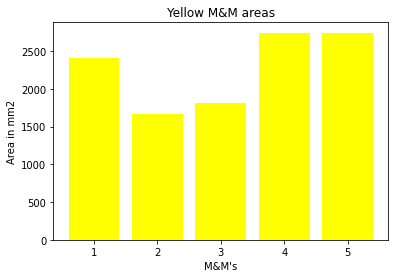

In [ ]:
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(mask_g,connectivity=8)
h = np.zeros(num_labels-1)
x = np.zeros(num_labels-1)

for j in range(num_labels-1):
  h[j] = stats[j+1,4]
  x[j] = j+1

c = 'green'
 
#bar plot
plt.bar(x, height = h, color = c)
plt.title('Green M&M areas')

plt.ylabel("Area in mm2")
plt.xlabel("M&M's")

plt.show()




num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(mask_r,connectivity=8)
h = np.zeros(num_labels-1)
x = np.zeros(num_labels-1)

for j in range(num_labels-1):
  h[j] = stats[j+1,4]
  x[j] = j+1

c = 'red'
 
#bar plot
plt.bar(x, height = h, color = c)
plt.title('Red M&M areas')

plt.ylabel("Area in mm2")
plt.xlabel("M&M's")

plt.show()



num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(mask_b,connectivity=8)
h = np.zeros(num_labels-1)
x = np.zeros(num_labels-1)

for j in range(num_labels-1):
  h[j] = stats[j+1,4]
  x[j] = j+1

c = 'blue'
 
#bar plot
plt.bar(x, height = h, color = c)
plt.title('Blue M&M areas')

plt.ylabel("Area in mm2")
plt.xlabel("M&M's")

plt.show()

 
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(mask_y,connectivity=8)
h = np.zeros(num_labels-1)
x = np.zeros(num_labels-1)

for j in range(num_labels-1):
  h[j] = stats[j+1,4]
  x[j] = j+1

c = 'yellow'
 
#bar plot
plt.bar(x, height = h, color = c)
plt.title('Yellow M&M areas')

plt.ylabel("Area in mm2")
plt.xlabel("M&M's")

plt.show()

And we can also plot the histograms for how many M&M of each area there are:

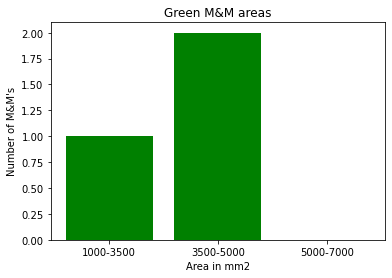

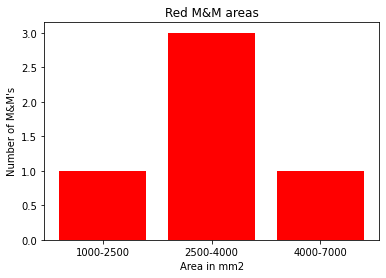

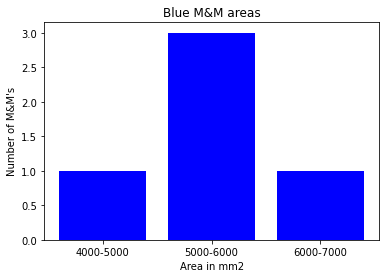

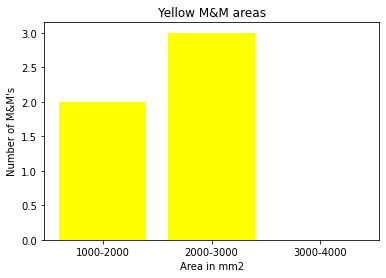

In [ ]:
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(mask_g,connectivity=8)
h = np.zeros(num_labels)

for j in range(num_labels):
  if (j > 0):
    if (stats[j,4] > 1000 and stats[j,4] <= 3500):
      h[0] = h[0]+1
    elif (stats[j,4] > 3500 and stats[j,4] <= 6000):
      h[1] = h[1]+1
    elif (stats[j,4] > 6000 and stats[j,4] <= 8500):
      h[2] = h[2]+1

c = 'green'
 
bins = ['1000-3500', '3500-5000', '5000-7000']
n = [h[0], h[1], h[2]]

#bar plot
plt.bar(bins, n, color = c)
plt.title('Green M&M areas')

plt.xlabel("Area in mm2")
plt.ylabel("Number of M&M's")

plt.show()



num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(mask_r,connectivity=8)
h = np.zeros(num_labels)

for j in range(num_labels):
  if (j > 0):
    if (stats[j,4] > 1000 and stats[j,4] <= 2500):
      h[0] = h[0]+1
    elif (stats[j,4] > 2500 and stats[j,4] <= 4000):
      h[1] = h[1]+1
    elif (stats[j,4] > 4000 and stats[j,4] <= 7000):
      h[2] = h[2]+1

c = 'red'
 
bins = ['1000-2500', '2500-4000', '4000-7000']
n = [h[0], h[1], h[2]]

#bar plot
plt.bar(bins, n, color = c)
plt.title('Red M&M areas')

plt.xlabel("Area in mm2")
plt.ylabel("Number of M&M's")

plt.show()



num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(mask_b,connectivity=8)
h = np.zeros(num_labels)

for j in range(num_labels):
  if (j > 0):
    if (stats[j,4] > 4000 and stats[j,4] <= 5000):
      h[0] = h[0]+1
    elif (stats[j,4] > 5000 and stats[j,4] <= 6000):
      h[1] = h[1]+1
    elif (stats[j,4] > 6000 and stats[j,4] <= 7000):
      h[2] = h[2]+1

c = 'blue'
 
bins = ['4000-5000', '5000-6000', '6000-7000']
n = [h[0], h[1], h[2]]

#bar plot
plt.bar(bins, n, color = c)
plt.title('Blue M&M areas')

plt.xlabel("Area in mm2")
plt.ylabel("Number of M&M's")

plt.show()



num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(mask_y,connectivity=8)
h = np.zeros(num_labels)

for j in range(num_labels):
  if (j > 0):
    if (stats[j,4] > 1000 and stats[j,4] <= 2000):
      h[0] = h[0]+1
    elif (stats[j,4] > 2000 and stats[j,4] <= 3000):
      h[1] = h[1]+1
    elif (stats[j,4] > 3000 and stats[j,4] <= 4000):
      h[2] = h[2]+1

c = 'yellow'
 
bins = ['1000-2000', '2000-3000', '3000-4000']
n = [h[0], h[1], h[2]]

#bar plot
plt.bar(bins, n, color = c)
plt.title('Yellow M&M areas')

plt.xlabel("Area in mm2")
plt.ylabel("Number of M&M's")

plt.show()

In order to facilitate the proccess of M&M detection and verification we believe the M&Ms should be evenly spaced out in a uniform background. We should not produce the color brown, and maybe bounce the light or use a polarized lens in orther to remove glare.

Valorização Extra:








In [ ]:
# Get calibration info
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

extrinsic2 = cv.imread("/content/drive/My Drive/GreyBackground/extrinsic.png")

h,  w = extrinsic2.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# undistort
square2 = cv.undistort(extrinsic2, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
square2 = square2[y:y+h, x:x+w]
cv.imwrite('calibresult.png', square2)

#cv2_imshow(square2)

objp3 = np.zeros((4*7,3), np.float32)
objp3[:,:2] = np.mgrid[0:7,0:4].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints3 = [] # 3d point in real world space
imgpoints3 = [] # 2d points in image plane.

gray_square2 = cv.cvtColor(square2, cv.COLOR_BGR2GRAY)

ret, corners = cv.findChessboardCorners(gray_square2, (7,4), None)

objpoints3.append(objp2)
corners3_square = cv.cornerSubPix(gray_square2,corners, (11,11), (-1,-1), criteria)
imgpoints3.append(corners2_square)

# Draw and display the corners
cv.drawChessboardCorners(square2, (7,4), corners2_square, ret)
#cv2_imshow(square2)

c1 = corners[0,0,0]
c2 = corners[1,0,0]

side = c1-c2

pix = (21/side)**2

# ~80 pixels per square, which means 80 pixels = 21 mm 
# 1 pixel is 0,2625 mm
#1 pix2 ~ 0.06 mm2

------------------IMAGE 0------------------
Total labels: 0 

Green labels: 0
Green area in pixels: 0
Green area in millimeters: 0.0 

Red labels: 0
Red area in pixels: 0
Red area in millimeters: 0.0 

Blue labels: 0
Blue area in pixels: 0
Blue area in millimeters: 0.0 

Brown labels: 0
Brown area in pixels: 0
Brown area in millimeters: 0.0 

Yellow labels: 0 
Yellow area in pixels: 0
Yellow area in millimeters: 0.0 

Total area in pixels: 0 
Total area in millimeters: 0.0 


------------------IMAGE 1------------------
Total labels: 12 

Green labels: 0
Green area in pixels: 0
Green area in millimeters: 0.0 

Red labels: 0
Red area in pixels: 0
Red area in millimeters: 0.0 

Blue labels: 7
Blue area in pixels: 36781
Blue area in millimeters: 2518.85 

Brown labels: 0
Brown area in pixels: 0
Brown area in millimeters: 0.0 

Yellow labels: 5 
Yellow area in pixels: 7368
Yellow area in millimeters: 504.58 

Total area in pixels: 44149 
Total area in millimeters: 3023.43 


---------------

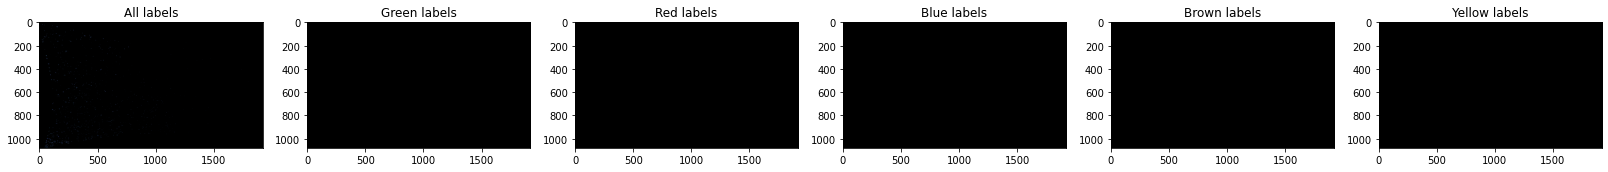

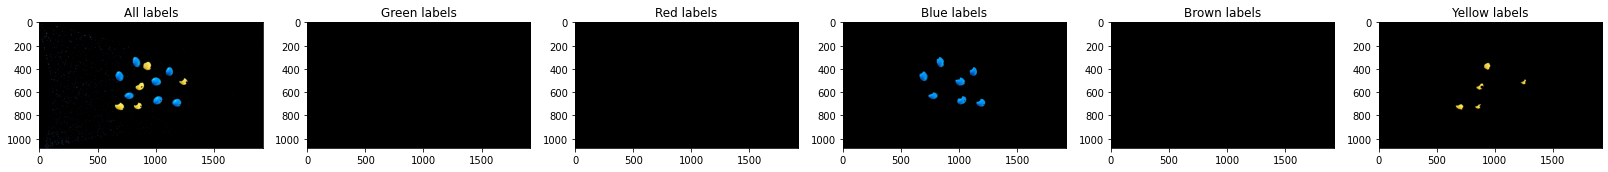

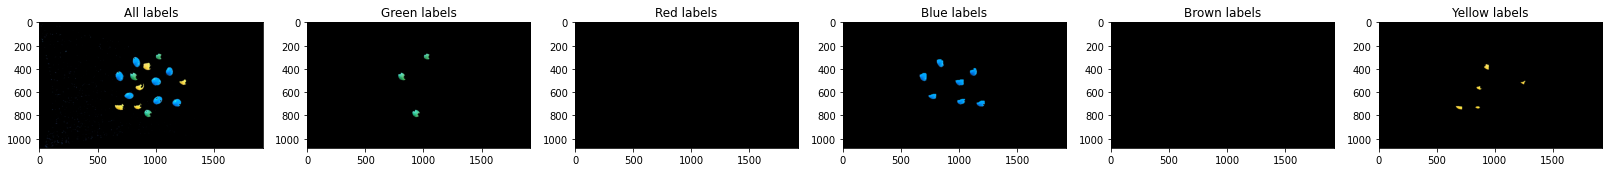

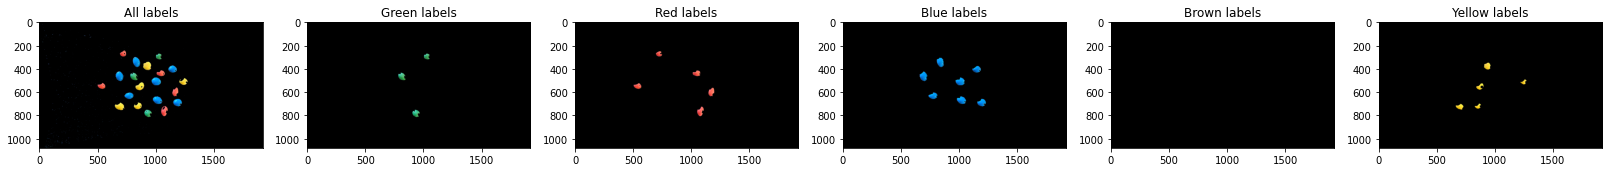

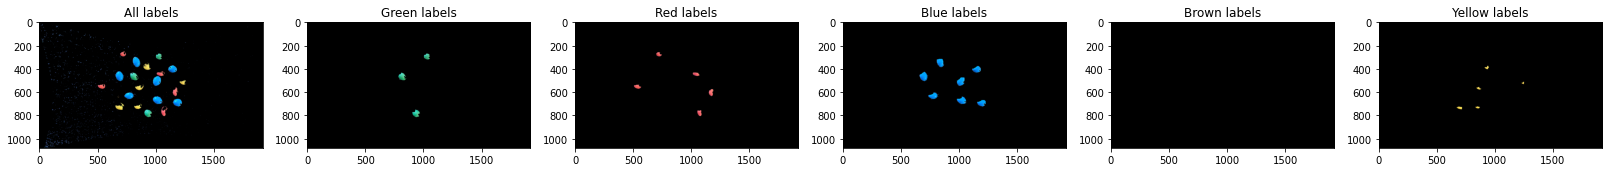

In [ ]:
pics = glob.glob('/content/drive/My Drive/GreyBackground/calib_img *.png')

i = 0

for fname in pics:

  if (i < 5):

    print(f"------------------IMAGE {i}------------------")

    fg = cv.imread(fname)

    h,  w = fg.shape[:2]
    newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

    # undistort
    dst_fg = cv.undistort(fg, mtx, dist, None, newcameramtx)

    # Showing the output
    #cv2_imshow(roi_img)

    # Convert from BGR to HSV 
    hsv = cv.cvtColor(dst_fg, cv.COLOR_BGR2HSV);

    # loop over each of the individual channels and display them
    h_img, s_img, v_img  = cv.split(hsv)

    gray = cv.cvtColor(dst_fg, cv.COLOR_BGR2GRAY);

    threshold = 120
    kernel = np.ones((6,6),np.uint8)

    img_binary = cv.threshold(s_img, threshold, max_value, thresh_type)[1] 
    #img_binary = cv.dilate(img_binary, kernel, iterations=3)
    eroded = cv.erode(img_binary, kernel=kernel, iterations=1)
    opened = cv.morphologyEx(eroded, cv.MORPH_OPEN, kernel)
    #cv2_imshow(opened)

    #Connected-Component Labeling
    ret, labels = cv.connectedComponents(opened)
    lab = np.max(labels)
    print(f"Total labels: {lab} \n")

    if (np.max(labels) == 0):
      lab = 1

    # Map component labels to hue val
    label_hue = np.uint8(179*labels/lab)
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img2 = cv.merge([label_hue, blank_ch, blank_ch])

    if (np.max(labels) == 0):
      lab = 0

    # cvt to BGR for display
    labeled_img = cv.cvtColor(labeled_img2, cv.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    segmented_img = cv.bitwise_and(dst_fg, dst_fg, mask=img_binary)
    # Showing the output
    #cv2_imshow(segmented_img)

    cv.cvtColor(segmented_img, cv.COLOR_BGR2HSV,segmented_img);

    ## mask of green (36,25,25) ~ (86, 255,255)

    mask_g = cv.inRange(segmented_img, (36, 25, 25), (86, 255,255))

    mask_g = cv.erode(mask_g, kernel, iterations=2)
    mask_g = cv.dilate(mask_g, kernel, iterations=5)
    cv.cvtColor(segmented_img, cv.COLOR_HSV2BGR,segmented_img);
    green = cv.bitwise_and(segmented_img, segmented_img, mask=mask_g)

    #cv2_imshow(green)
    ret, labels = cv.connectedComponents(mask_g)
    print(f"Green labels: {np.max(labels)}")

    g_pixels = cv.countNonZero(mask_g)
    print(f"Green area in pixels: {g_pixels}")

    area_g = (cv.countNonZero(mask_g)*pix)
    print(f"Green area in millimeters: {round(area_g, 2)} \n")




    #Mask for reds
    cv.cvtColor(segmented_img, cv.COLOR_BGR2HSV,segmented_img);
    mask_r = cv.inRange(segmented_img, (0, 25, 25), (15, 255,255)) + cv.inRange(segmented_img, (110, 25, 25), (255, 255,255))
    mask_r = cv.erode(mask_r, kernel, iterations=2)
    mask_r = cv.dilate(mask_r, kernel, iterations=3)
    cv.cvtColor(segmented_img, cv.COLOR_HSV2BGR,segmented_img);
    red = cv.bitwise_and(segmented_img, segmented_img, mask=mask_r)

    #cv2_imshow(red)
    ret, labels = cv.connectedComponents(mask_r)
    print(f"Red labels: {np.max(labels)}")

    r_pixels = cv.countNonZero(mask_r)
    print(f"Red area in pixels: {r_pixels}")

    area_r = (cv.countNonZero(mask_r)*pix)
    print(f"Red area in millimeters: {round(area_r, 2)} \n")




    #Mask for blues
    cv.cvtColor(segmented_img, cv.COLOR_BGR2HSV,segmented_img);
    mask_b = cv.inRange(segmented_img, (100, 25, 25), (110, 255,255))
    mask_b = cv.erode(mask_b, kernel, iterations=2)
    mask_b = cv.dilate(mask_b, kernel, iterations=5)
    cv.cvtColor(segmented_img, cv.COLOR_HSV2BGR,segmented_img);
    blue = cv.bitwise_and(segmented_img, segmented_img, mask=mask_b)

    #cv2_imshow(blue)
    ret, labels = cv.connectedComponents(mask_b)
    print(f"Blue labels: {np.max(labels)}")

    b_pixels = cv.countNonZero(mask_b)
    print(f"Blue area in pixels: {b_pixels}")

    area_b = (cv.countNonZero(mask_b)*pix)
    print(f"Blue area in millimeters: {round(area_b, 2)} \n")




    #Mask for browns
    cv.cvtColor(dst_fg, cv.COLOR_BGR2HSV,dst_fg);
    mask_br = cv.inRange(dst_fg, (6, 63, 0), (23, 255, 81))
    mask_br = cv.erode(mask_br, kernel, iterations=2)
    mask_br = cv.dilate(mask_br, kernel, iterations=5)
    cv.cvtColor(dst_fg, cv.COLOR_HSV2BGR,dst_fg);
    brown = cv.bitwise_and(dst_fg, dst_fg, mask=mask_br)

    #cv2_imshow(brown)
    ret, labels = cv.connectedComponents(mask_br)
    print(f"Brown labels: {np.max(labels)}")

    br_pixels = cv.countNonZero(mask_br)
    print(f"Brown area in pixels: {br_pixels}")

    area_br = (cv.countNonZero(mask_br)*pix)
    print(f"Brown area in millimeters: {round(area_br, 2)} \n")

    #Mask for yellows
    cv.cvtColor(segmented_img, cv.COLOR_BGR2HSV,segmented_img);
    mask_y = cv.inRange(segmented_img, (15, 25, 25), (40, 255,255))
    mask_y = cv.erode(mask_y, kernel, iterations=2)
    cv.cvtColor(segmented_img, cv.COLOR_HSV2BGR,segmented_img);
    yellow = cv.bitwise_and(segmented_img, segmented_img, mask=mask_y)



    #cv2_imshow(yellow)
    ret, labels = cv.connectedComponents(mask_y)
    print(f"Yellow labels: {np.max(labels)} ")

    y_pixels = cv.countNonZero(mask_y)
    print(f"Yellow area in pixels: {y_pixels}")

    area_y = (cv.countNonZero(mask_y)*pix)
    print(f"Yellow area in millimeters: {round(area_y, 2)} \n")

    total_pixels = g_pixels+r_pixels+b_pixels+y_pixels
    total_area = area_g+area_r+area_b+area_y
    print(f"Total area in pixels: {total_pixels} ")
    print(f"Total area in millimeters: {round(total_area, 2)} \n\n")

    # converting from BGR to RGB for displaying in plt.
    cv.cvtColor(segmented_img, cv.COLOR_BGR2RGB, segmented_img); 
    cv.cvtColor(green, cv.COLOR_BGR2RGB, green); 
    cv.cvtColor(red, cv.COLOR_BGR2RGB, red); 
    cv.cvtColor(blue, cv.COLOR_BGR2RGB, blue); 
    cv.cvtColor(yellow, cv.COLOR_BGR2RGB, yellow); 

    plt.figure(figsize=(28,29))
    plt.subplot(161)
    plt.imshow(segmented_img)
    plt.title('All labels')

    plt.subplot(162)
    plt.imshow(green)
    plt.title('Green labels')

    plt.subplot(163)
    plt.imshow(red)
    plt.title('Red labels')

    plt.subplot(164)
    plt.imshow(blue)
    plt.title('Blue labels')

    plt.subplot(165)
    plt.imshow(brown)
    plt.title('Brown labels')

    plt.subplot(166)
    plt.imshow(yellow)
    plt.title('Yellow labels')

    i = i+1

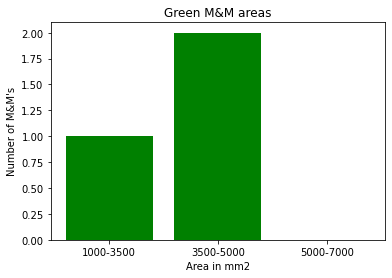

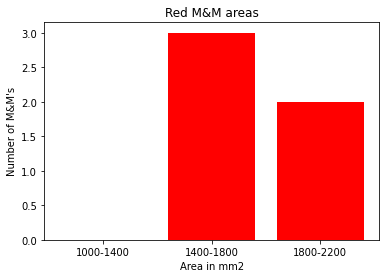

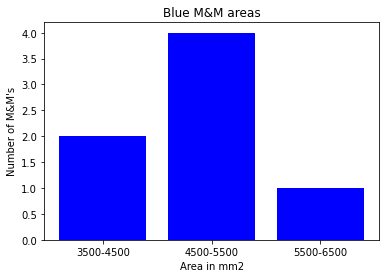

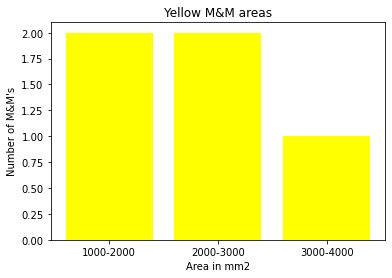

In [ ]:
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(mask_g,connectivity=8)
h = np.zeros(num_labels)

for j in range(num_labels):
  if (j > 0):
    if (stats[j,4] > 1000 and stats[j,4] <= 3500):
      h[0] = h[0]+1
    elif (stats[j,4] > 3500 and stats[j,4] <= 5000):
      h[1] = h[1]+1
    elif (stats[j,4] > 5000 and stats[j,4] <= 7000):
      h[2] = h[2]+1

c = 'green'
 
bins = ['1000-3500', '3500-5000', '5000-7000']
n = [h[0], h[1], h[2]]

#bar plot
plt.bar(bins, n, color = c)
plt.title('Green M&M areas')

plt.xlabel("Area in mm2")
plt.ylabel("Number of M&M's")

plt.show()



num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(mask_r,connectivity=8)
h = np.zeros(num_labels)

for j in range(num_labels):
  if (j > 0):
    if (stats[j,4] > 1000 and stats[j,4] <= 1400):
      h[0] = h[0]+1
    elif (stats[j,4] > 1400 and stats[j,4] <= 1800):
      h[1] = h[1]+1
    elif (stats[j,4] > 1800 and stats[j,4] <= 2200):
      h[2] = h[2]+1

c = 'red'
 
bins = ['1000-1400', '1400-1800', '1800-2200']
n = [h[0], h[1], h[2]]

#bar plot
plt.bar(bins, n, color = c)
plt.title('Red M&M areas')

plt.xlabel("Area in mm2")
plt.ylabel("Number of M&M's")

plt.show()



num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(mask_b,connectivity=8)
h = np.zeros(num_labels)

for j in range(num_labels):
  if (j > 0):
    if (stats[j,4] > 3500 and stats[j,4] <= 4500):
      h[0] = h[0]+1
    elif (stats[j,4] > 4500 and stats[j,4] <= 5500):
      h[1] = h[1]+1
    elif (stats[j,4] > 5500 and stats[j,4] <= 6500):
      h[2] = h[2]+1

c = 'blue'
 
bins = ['3500-4500', '4500-5500', '5500-6500']
n = [h[0], h[1], h[2]]

#bar plot
plt.bar(bins, n, color = c)
plt.title('Blue M&M areas')

plt.xlabel("Area in mm2")
plt.ylabel("Number of M&M's")

plt.show()



num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(mask_y,connectivity=8)
h = np.zeros(num_labels)

for j in range(num_labels):
  if (j > 0):
    if (stats[j,4] > 200 and stats[j,4] <= 450):
      h[0] = h[0]+1
    elif (stats[j,4] > 450 and stats[j,4] <= 700):
      h[1] = h[1]+1
    elif (stats[j,4] > 700 and stats[j,4] <= 950):
      h[2] = h[2]+1

c = 'yellow'
 
bins = ['1000-2000', '2000-3000', '3000-4000']
n = [h[0], h[1], h[2]]

#bar plot
plt.bar(bins, n, color = c)
plt.title('Yellow M&M areas')

plt.xlabel("Area in mm2")
plt.ylabel("Number of M&M's")

plt.show()

------------------IMAGE 5 ------------------
Total labels: 15 

Green labels: 2
Green area in pixels: 11983
Green area in millimeters: 820.62 

Red labels: 4
Red area in pixels: 11314
Red area in millimeters: 774.81 

Blue labels: 5
Blue area in pixels: 30022
Blue area in millimeters: 2055.98 

Brown labels: 0
Brown area in pixels: 0
Brown area in millimeters: 0.0 

Yellow labels: 4 
Yellow area in pixels: 9220
Yellow area in millimeters: 631.41 

Total area in pixels: 62539 
Total area in millimeters: 4282.82 




Text(0.5, 1.0, 'Yellow labels')

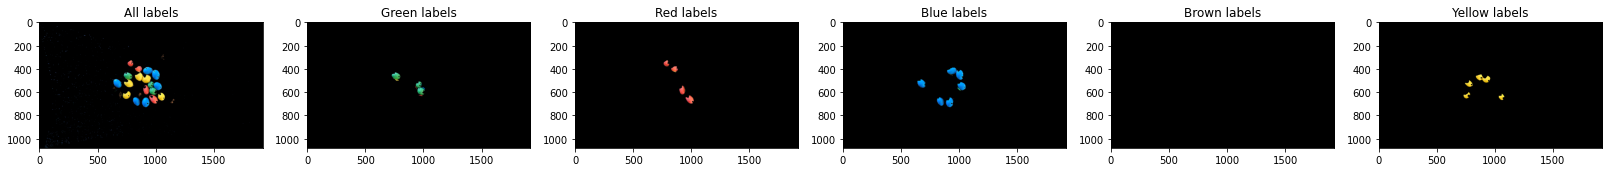

In [ ]:
print(f"------------------IMAGE 5 ------------------")

fg = cv.imread('/content/drive/My Drive/GreyBackground/calib_img 5.png')

h,  w = fg.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# undistort
dst_fg = cv.undistort(fg, mtx, dist, None, newcameramtx)

# Showing the output
#cv2_imshow(roi_img)

# Convert from BGR to HSV 
hsv = cv.cvtColor(dst_fg, cv.COLOR_BGR2HSV);

# loop over each of the individual channels and display them
h_img, s_img, v_img  = cv.split(hsv)

gray = cv.cvtColor(dst_fg, cv.COLOR_BGR2GRAY);

threshold = 120
kernel = np.ones((6,6),np.uint8)

img_binary = cv.threshold(s_img, threshold, max_value, thresh_type)[1] 
#img_binary = cv.dilate(img_binary, kernel, iterations=3)
eroded = cv.erode(img_binary, kernel=kernel, iterations=1)
opened = cv.morphologyEx(eroded, cv.MORPH_OPEN, kernel)
#cv2_imshow(opened)

#Connected-Component Labeling
ret, labels = cv.connectedComponents(opened)
lab = np.max(labels)
print(f"Total labels: {lab} \n")

if (np.max(labels) == 0):
  lab = 1

# Map component labels to hue val
label_hue = np.uint8(179*labels/lab)
blank_ch = 255*np.ones_like(label_hue)
labeled_img2 = cv.merge([label_hue, blank_ch, blank_ch])

if (np.max(labels) == 0):
  lab = 0

# cvt to BGR for display
labeled_img = cv.cvtColor(labeled_img2, cv.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

segmented_img = cv.bitwise_and(dst_fg, dst_fg, mask=img_binary)
# Showing the output
#cv2_imshow(segmented_img)

cv.cvtColor(segmented_img, cv.COLOR_BGR2HSV,segmented_img);

## mask of green (36,25,25) ~ (86, 255,255)

mask_g = cv.inRange(segmented_img, (36, 25, 25), (86, 255,255))

mask_g = cv.erode(mask_g, kernel, iterations=2)
mask_g = cv.dilate(mask_g, kernel, iterations=5)
cv.cvtColor(segmented_img, cv.COLOR_HSV2BGR,segmented_img);
green = cv.bitwise_and(segmented_img, segmented_img, mask=mask_g)

#cv2_imshow(green)
ret, labels = cv.connectedComponents(mask_g)
print(f"Green labels: {np.max(labels)}")

g_pixels = cv.countNonZero(mask_g)
print(f"Green area in pixels: {g_pixels}")

area_g = (cv.countNonZero(mask_g)*pix)
print(f"Green area in millimeters: {round(area_g, 2)} \n")




#Mask for reds
cv.cvtColor(segmented_img, cv.COLOR_BGR2HSV,segmented_img);
mask_r = cv.inRange(segmented_img, (0, 25, 25), (15, 255,255)) + cv.inRange(segmented_img, (110, 25, 25), (255, 255,255))
mask_r = cv.erode(mask_r, kernel, iterations=2)
mask_r = cv.dilate(mask_r, kernel, iterations=3)
cv.cvtColor(segmented_img, cv.COLOR_HSV2BGR,segmented_img);
red = cv.bitwise_and(segmented_img, segmented_img, mask=mask_r)

#cv2_imshow(red)
ret, labels = cv.connectedComponents(mask_r)
print(f"Red labels: {np.max(labels)}")

r_pixels = cv.countNonZero(mask_r)
print(f"Red area in pixels: {r_pixels}")

area_r = (cv.countNonZero(mask_r)*pix)
print(f"Red area in millimeters: {round(area_r, 2)} \n")




#Mask for blues
cv.cvtColor(segmented_img, cv.COLOR_BGR2HSV,segmented_img);
mask_b = cv.inRange(segmented_img, (100, 25, 25), (110, 255,255))
mask_b = cv.erode(mask_b, kernel, iterations=2)
mask_b = cv.dilate(mask_b, kernel, iterations=5)
cv.cvtColor(segmented_img, cv.COLOR_HSV2BGR,segmented_img);
blue = cv.bitwise_and(segmented_img, segmented_img, mask=mask_b)

#cv2_imshow(blue)
ret, labels = cv.connectedComponents(mask_b)
print(f"Blue labels: {np.max(labels)}")

b_pixels = cv.countNonZero(mask_b)
print(f"Blue area in pixels: {b_pixels}")

area_b = (cv.countNonZero(mask_b)*pix)
print(f"Blue area in millimeters: {round(area_b, 2)} \n")




#Mask for browns
cv.cvtColor(dst_fg, cv.COLOR_BGR2HSV,dst_fg);
mask_br = cv.inRange(dst_fg, (6, 63, 0), (23, 255, 81))
mask_br = cv.erode(mask_br, kernel, iterations=2)
mask_br = cv.dilate(mask_br, kernel, iterations=5)
cv.cvtColor(dst_fg, cv.COLOR_HSV2BGR,dst_fg);
brown = cv.bitwise_and(dst_fg, dst_fg, mask=mask_br)

#cv2_imshow(brown)
ret, labels = cv.connectedComponents(mask_br)
print(f"Brown labels: {np.max(labels)}")

br_pixels = cv.countNonZero(mask_br)
print(f"Brown area in pixels: {br_pixels}")

area_br = (cv.countNonZero(mask_br)*pix)
print(f"Brown area in millimeters: {round(area_br, 2)} \n")

#Mask for yellows
cv.cvtColor(segmented_img, cv.COLOR_BGR2HSV,segmented_img);
mask_y = cv.inRange(segmented_img, (15, 25, 25), (40, 255,255))
mask_y = cv.erode(mask_y, kernel, iterations=2)
cv.cvtColor(segmented_img, cv.COLOR_HSV2BGR,segmented_img);
yellow = cv.bitwise_and(segmented_img, segmented_img, mask=mask_y)



#cv2_imshow(yellow)
ret, labels = cv.connectedComponents(mask_y)
print(f"Yellow labels: {np.max(labels)} ")

y_pixels = cv.countNonZero(mask_y)
print(f"Yellow area in pixels: {y_pixels}")

area_y = (cv.countNonZero(mask_y)*pix)
print(f"Yellow area in millimeters: {round(area_y, 2)} \n")

total_pixels = g_pixels+r_pixels+b_pixels+y_pixels
total_area = area_g+area_r+area_b+area_y
print(f"Total area in pixels: {total_pixels} ")
print(f"Total area in millimeters: {round(total_area, 2)} \n\n")

# converting from BGR to RGB for displaying in plt.
cv.cvtColor(segmented_img, cv.COLOR_BGR2RGB, segmented_img); 
cv.cvtColor(green, cv.COLOR_BGR2RGB, green); 
cv.cvtColor(red, cv.COLOR_BGR2RGB, red); 
cv.cvtColor(blue, cv.COLOR_BGR2RGB, blue); 
cv.cvtColor(yellow, cv.COLOR_BGR2RGB, yellow); 

plt.figure(figsize=(28,29))
plt.subplot(161)
plt.imshow(segmented_img)
plt.title('All labels')

plt.subplot(162)
plt.imshow(green)
plt.title('Green labels')

plt.subplot(163)
plt.imshow(red)
plt.title('Red labels')

plt.subplot(164)
plt.imshow(blue)
plt.title('Blue labels')

plt.subplot(165)
plt.imshow(brown)
plt.title('Brown labels')

plt.subplot(166)
plt.imshow(yellow)
plt.title('Yellow labels')